In [24]:
import pandas as pd 
import os

### import ZFF lists #######
newdf = pd.DataFrame()
for i in range(2011,2021+1):
    
    if os.path.exists("data/Zurich Film Festival " + str(i) + ".csv"):

    #   dfx            = pd.read_csv ("data/Zurich Film Festival 2019.csv", encoding='latin-1')
        dfx            = pd.read_csv (("data/Zurich Film Festival " + str(i) + ".csv"), encoding='latin-1')
    
        dfx['dat_per'] = i                                  #add column
        newdf          = newdf.append(dfx)                  #add all rouws
    
newdf.rename(columns = {"Num Votes": "num_votes", "IMDb Rating": "imdb_rating"}, inplace = True)
newdf[(newdf.num_votes <100) & (newdf.imdb_rating> 8)].head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,imdb_rating,Runtime (mins),Year,Genres,num_votes,Release Date,Directors,dat_per
20,21,tt1733581,2011-09-15,2011-09-15,NaN,Skateistan: Four Wheels and a Board in Kabul,https://www.imdb.com/title/tt1733581/,movie,8.6,100.0,2011.0,Documentary,70.0,2011-02-15,Kai Sehr,2011
36,37,tt2294819,2012-09-06,2012-09-06,NaN,Souls of Zen,https://www.imdb.com/title/tt2294819/,movie,8.6,89.0,2012.0,Documentary,40.0,2012-09-21,"Tim Graf, Jakob Montrasio",2012
22,23,tt4957736,2015-09-12,2015-09-12,NaN,Zhyva vatra,https://www.imdb.com/title/tt4957736/,movie,8.2,77.0,2015.0,Documentary,75.0,2015-04-30,Ostap Kostyuk,2015
48,49,tt7218830,2017-09-16,2017-09-16,NaN,Esteban,https://www.imdb.com/title/tt7218830/,movie,8.2,90.0,2016.0,"Drama, Music",56.0,2016-12-31,Jonal Cosculluela,2017
134,135,tt7181728,2017-09-16,2017-09-16,NaN,Kvodo,https://www.imdb.com/title/tt7181728/,tvSeries,8.9,36.0,2017.0,"Crime, Drama, Thriller",47.0,2017-04-08,NaN,2017


In [32]:
### import my Ratings #######
cwdf = pd.DataFrame()
#cwdf = pd.read_csv ("data/cw1312_ratings_20191027.csv", encoding='latin-1')
cwdf = pd.read_csv ("data/ratings.csv", encoding='latin-1')
cwdf.rename(columns = {"Your Rating": "your_rating"}, inplace = True)

### left outer join my rating
combdf = pd.merge(  newdf.loc[:,('Const', 'Title', 'Year', 'Genres', 'Directors','num_votes','imdb_rating','dat_per')]
                  , cwdf.loc[:,( 'Const', 'your_rating')]
                  , how = 'left', left_on="Const", right_on="Const"
                 )
#                 ).drop('Const', axis=1)
combdf['rate_diff2'] = combdf['your_rating'] - combdf['imdb_rating']
combdf.head()

,Const,Title,Year,Genres,Directors,num_votes,imdb_rating,dat_per,your_rating,rate_diff2
0,tt1675192,Take Shelter,2011.0,"Drama, Sci-Fi, Thriller",Jeff Nichols,97478.0,7.4,2011,NaN,NaN
1,tt1598778,Contagion,2011.0,"Drama, Thriller",Steven Soderbergh,293171.0,6.7,2011,NaN,NaN
2,tt1865291,Agnus Dei: Cordero de Dios,2011.0,"Documentary, Biography, Drama, History, Romance",Alejandra Sánchez,45.0,7.0,2011,NaN,NaN
3,tt0112818,Dead Man Walking,1995.0,"Crime, Drama",Tim Robbins,91910.0,7.5,2011,NaN,NaN
4,tt1787777,Page One: Inside the New York Times,2011.0,Documentary,Andrew Rossi,3345.0,6.9,2011,NaN,NaN


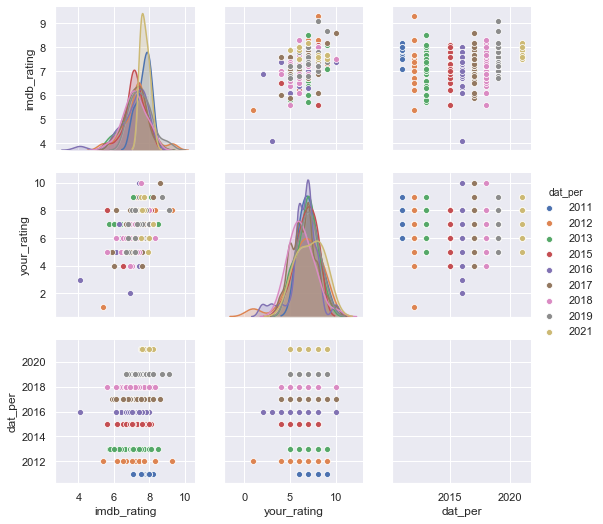

In [38]:
import seaborn as sns
sns.set()
#sns.pairplot(iris, hue='species', size=2.5)
sns.pairplot(combdf[combdf['rate_diff2'].notna()].loc[:,('imdb_rating', 'your_rating', 'dat_per')] 
                           , hue='dat_per')


In [66]:
#combdf[combdf['rate_diff2'].notnull()]    
combdf[combdf.rate_diff2 > 2].head(3)

,Const,Title,Year,Genres,Directors,num_votes,imdb_rating,dat_per,your_rating,rate_diff2
319,tt4276112,Breaking a Monster,2015.0,"Documentary, Biography, Drama, Music",Luke Meyer,269.0,5.6,2015,8.0,2.4
606,tt3909336,Enas allos kosmos,2015.0,"Drama, Romance",Christopher Papakaliatis,7252.0,7.4,2016,10.0,2.6
772,tt6742252,Den skyldige,2018.0,"Crime, Drama, Thriller",Gustav Möller,30942.0,7.5,2018,10.0,2.5


In [62]:
import pandas as pd
import numpy  as np
#title_principals= pd.read_csv(gzip.open('data/title.principals.tsv.gz', 'rb'),delimiter='\t',encoding='utf-8')
#name_basics  = pd.read_csv(gzip.open('data/name.basics.tsv.gz', 'rb')     ,delimiter='\t',encoding='utf-8')
P = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz'
                 , compression='gzip'
                 , delimiter='\t',encoding='utf-8'
                 , header=0
                # , sep= " "
                 , quotechar='"'
                 #, error_bad_lines=False
                )
P["cat_cln"] = np.where (P['category'].str.contains('actor') | P['category'].str.contains('actress')
                         ,'actor',P['category'])
P.head()
#pd.read_csv(gzip.open('data/name.basics.tsv.gz', 'rb'),delimiter='\t',encoding='utf-8')
#newdf["Const", "dat_per"]


,tconst,ordering,nconst,category,job,characters,cat_cln
0,tt0000001,1,nm1588970,self,\N,"[""Self""]",self
1,tt0000001,2,nm0005690,director,\N,\N,director
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N,cinematographer
3,tt0000002,1,nm0721526,director,\N,\N,director
4,tt0000002,2,nm1335271,composer,\N,\N,composer


In [43]:
T= pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz'
                 , compression='gzip'
                 , delimiter='\t',encoding='utf-8'
                 , header=0
                # , sep= " "
                 , quotechar='"'
                 #, error_bad_lines=False
                )

T["flg_doc"] = np.where (T['genres'].str.contains('Documentary'),1,0)


T.head()

C:\Users\cw13\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,flg_doc
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",0


In [44]:
N = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz'
                 , compression='gzip'
                 , delimiter='\t',encoding='utf-8'
                 , header=0
                # , sep= " "
                 , quotechar='"'
                 #, error_bad_lines=False
                )
N.head()


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0037382,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0083922,tt0050976,tt0050986"


In [48]:
P[P.nconst =="nm9824984"] 
N[N.nconst =="nm9824984"] 
X[X.tconst =="tt3594268"]. 

,tconst,averageRating,numVotes,nconst,primaryProfession,primaryName,birthYear,deathYear,titleType,primaryTitle,...,runtimeMinutes,genres,flg_doc,ordering,category,job,characters,cat_cln,Const,dat_per
5728,tt3594268,5.8,253,nm0079916,actor,Hermann Beyer,1943,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,4,actor,\N,"[""Hans Zankl""]",actor,tt3594268,2015
5729,tt3594268,5.8,253,nm0165361,"producer,production_manager,actor",Jakob Claussen,1961,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,8,producer,producer,\N,producer,tt3594268,2015
5730,tt3594268,5.8,253,nm0701318,"producer,production_manager",Ulrike Putz,\N,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,9,producer,producer,\N,producer,tt3594268,2015
5731,tt3594268,5.8,253,nm0937034,"writer,director,assistant_director",Frieder Wittich,1974,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,5,director,\N,\N,director,tt3594268,2015
5732,tt3594268,5.8,253,nm1465580,"actor,director,writer",Nahuel Pérez Biscayart,1986,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,1,actor,\N,"[""Rauli Kantas""]",actor,tt3594268,2015
5733,tt3594268,5.8,253,nm2047699,"writer,producer,director",Oliver Ziegenbalg,1971,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,6,writer,screenplay,\N,writer,tt3594268,2015
5734,tt3594268,5.8,253,nm2337337,actress,Friederike Becht,1986,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,2,actress,\N,"[""Lara""]",actor,tt3594268,2015
5735,tt3594268,5.8,253,nm3357538,"composer,actor,soundtrack",Tobias Jundt,1978,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,10,composer,\N,\N,composer,tt3594268,2015
5736,tt3594268,5.8,253,nm3609745,actress,Lena Klenke,1995,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,3,actress,\N,"[""Anna Lind""]",actor,tt3594268,2015
5737,tt3594268,5.8,253,nm7386226,writer,Benedict Wells,1984,\N,movie,Becks letzter Sommer,...,98,"Comedy,Drama,Music",0,7,writer,novel,\N,writer,tt3594268,2015


In [65]:
# Rating
R = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz'
                 , compression='gzip'
                 , delimiter='\t',encoding='utf-8'
                 , header=0
                # , sep= " "
                 , quotechar='"'
                 #, error_bad_lines=False
                )
R.tail(3)

,tconst,averageRating,numVotes
1193565,tt9916720,5.3,138
1193566,tt9916766,7.1,17
1193567,tt9916778,7.5,31


In [117]:
zff = pd.DataFrame()
for i,j in zip(newdf["Const"], newdf["dat_per"]):
    df2 = (i,j,[P['tconst'] == i]).
    zff = zff.append(df2) 
#zff =P[P['tconst']== "tt3486542"].drop_duplicates().values.tolist()    
#zff


SyntaxError: invalid syntax (Temp/ipykernel_9984/1763133730.py, line 3)

In [67]:
newdf.loc[:,( 'Const', 'dat_per', 'Title')]
#P[P['tconst'] == newdf["Const"]].head()

zff = pd.merge(     P
                  , newdf.loc[:,( 'Const', 'dat_per')] 
                  , how = 'inner', left_on="tconst", right_on="Const"
                 )
zff = pd.merge(     T
                  , zff 
                  , how = 'inner', left_on="tconst", right_on="tconst"
                 )
zff = pd.merge(     N.loc[:, ('nconst','primaryProfession', 'primaryName', 'birthYear', 'deathYear')]
                  , zff
                  , how = 'inner', left_on="nconst", right_on="nconst"
                 )
zff = pd.merge(     R.loc[:, ('tconst','averageRating', 'numVotes')]
                  , zff
                  , how = 'inner', left_on="tconst", right_on="tconst"
                 )
print(P.shape,newdf.shape, zff.shape)


(47169368, 7) (1174, 16) (10863, 24)


In [68]:
#remove rows not needed 
X = zff[zff['category']!= "production_designer"] 
X = X[X['category']!= "archive_footage"]
print(X.shape, zff.shape)

#export
X.to_csv('data/zff.csv'  ,encoding='utf-8')

(10693, 24) (10863, 24)


In [11]:
zff.to_csv('data/zff.csv'  ,encoding='utf-8')

In [52]:
P.set_index("nconst", inplace = True, drop = False)  #set index permanently (inplace), keep column when index changes
P.head()

,tconst,ordering,nconst,category,job,characters
nconst,,,,,,
nm1588970,tt0000001,1,nm1588970,self,\N,"[""Self""]"
nm0005690,tt0000001,2,nm0005690,director,\N,\N
nm0374658,tt0000001,3,nm0374658,cinematographer,director of photography,\N
nm0721526,tt0000002,1,nm0721526,director,\N,\N
nm1335271,tt0000002,2,nm1335271,composer,\N,\N


In [51]:
# add coloumn: counter
S  = pd.merge(     P
                  , combdf.loc[:,( 'Const' )]
                  , how = 'inner', left_on="tconst", right_on="Const"
                 )
S["FREQ"] = 1

,tconst,ordering,nconst,category,job,characters,cat_cln,Const,FREQ
0,tt0026557,10,nm0005654,cinematographer,\N,\N,cinematographer,tt0026557,1
1,tt0026557,1,nm0373751,actor,\N,"[""Jakob Stäubli""]",actor,tt0026557,1
2,tt0026557,2,nm0445652,actress,\N,"[""Frieda Stäubli""]",actor,tt0026557,1
3,tt0026557,3,nm0041010,actress,\N,"[""Nellie Stäubli""]",actor,tt0026557,1
4,tt0026557,4,nm4326476,actor,\N,"[""André Brugger""]",actor,tt0026557,1
5,tt0026557,5,nm0503891,director,\N,\N,director,tt0026557,1
6,tt0026557,6,nm0512548,director,\N,\N,director,tt0026557,1
7,tt0026557,7,nm0502352,writer,\N,\N,writer,tt0026557,1
8,tt0026557,8,nm0917054,producer,producer,\N,producer,tt0026557,1
9,tt0026557,9,nm0005967,composer,\N,\N,composer,tt0026557,1


In [46]:
import numpy as np
T = S.pivot_table(  index   = ( 'tconst')
                  , columns = 'nconst'
              #     , aggfunc = ['count', 'min', 'max', 'mean']
                   , aggfunc = [ np.sum] 
                   , margins = True
                   , values = "FREQ" 
                   , fill_value = 0
             )


U  = pd.merge(      combdf 
                  , T
                  , how = 'left', left_on="Const", right_on="tconst"

                 )
T2 =(U.set_index(['Const'])
      .Genres.str.split(',\s*', expand=True)
      .stack()
      .reset_index()
      .pivot_table(index=['Const'], columns=0, fill_value=0, aggfunc='size') 
)           


U2  = pd.merge(     U 
                  , T2
                  , how = 'left', left_on="Const", right_on="Const"
                 ) 
U2.head()

C:\Users\cw13\AppData\Local\Temp/ipykernel_9984/614249423.py:12: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  U  = pd.merge(      combdf


,Const,Title,Year,Genres,Directors,num_votes,imdb_rating,dat_per,your_rating,rate_diff2,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt3473410,Bob and the Trees,2015.0,Drama,Diego Ongaro,144.0,6.5,2015,4.0,-2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt4899406,Boi Neon,2015.0,Drama,Gabriel Mascaro,2384.0,6.8,2015,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt2818252,Couple in a Hole,2015.0,"Drama, Thriller",Tom Geens,554.0,5.5,2015,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,tt3777384,Eva Nová,2015.0,Drama,Marko Skop,288.0,7.1,2015,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt3296658,Hrútar,2015.0,Drama,Grímur Hákonarson,11270.0,7.3,2015,6.0,-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
 
U2.drop( ['your_rating'], axis=1)

,Const,Title,Year,Genres,Directors,num_votes,imdb_rating,dat_per,rate_diff2,"(sum, nm0000008)",...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt3473410,Bob and the Trees,2015.0,Drama,Diego Ongaro,144.0,6.5,2015,-2.5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt4899406,Boi Neon,2015.0,Drama,Gabriel Mascaro,2384.0,6.8,2015,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt2818252,Couple in a Hole,2015.0,"Drama, Thriller",Tom Geens,554.0,5.5,2015,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,tt3777384,Eva Nová,2015.0,Drama,Marko Skop,288.0,7.1,2015,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt3296658,Hrútar,2015.0,Drama,Grímur Hákonarson,11270.0,7.3,2015,-1.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,tt0465551,Notes on a Scandal,2006.0,"Crime, Drama, Romance, Thriller",Richard Eyre,71781.0,7.4,2019,NaN,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
734,tt0414055,Elizabeth: The Golden Age,2007.0,"Biography, Drama, History, War",Shekhar Kapur,63177.0,6.8,2019,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
735,tt0368794,I'm Not There,2007.0,"Biography, Drama, Music, Western",Todd Haynes,54461.0,6.9,2019,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
736,tt2334873,Blue Jasmine,2013.0,Drama,Woody Allen,181872.0,7.3,2019,-0.3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
U2[U2.your_rating.notnull()].head()

,Const,Title,Year,Genres,Directors,num_votes,imdb_rating,dat_per,your_rating,rate_diff2,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt3473410,Bob and the Trees,2015.0,Drama,Diego Ongaro,144.0,6.5,2015,4.0,-2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt3296658,Hrútar,2015.0,Drama,Grímur Hákonarson,11270.0,7.3,2015,6.0,-1.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,tt3830162,Krigen,2015.0,"Crime, Drama, War",Tobias Lindholm,8843.0,7.1,2015,8.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,tt4636042,Las elegidas,2015.0,Drama,David Pablos,1508.0,6.7,2015,7.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,tt2862454,Äidin toive,2015.0,"Documentary, Biography, Family",Joonas Berghäll,88.0,6.9,2015,5.0,-1.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [370]:
U2[U2.your_rating.notnull()].head()
 

# import the class
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn                 import metrics

import matplotlib.pyplot     as plt
%matplotlib inline

# split - train - test

X = U2[U2.your_rating.notnull()].drop( ['your_rating', 'Directors', 'Genres', 'Title', 'Const', 'rate_diff2'], axis=1)              # create X (features) and y (response)
y = U2[U2.your_rating.notnull()].your_rating                                 # create X (features) and y (response) 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4)  # split

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test:  ', y_test.shape)


### logreg
logreg = LogisticRegression()  # instantiate model w/ default parameters
logreg.fit(X_train, y_train)   # fit w/data
y_pred= logreg.predict(X_test) # predict the response on test data
print ('logreg:          ', metrics.accuracy_score(y_test, y_pred)) #compare true outcome (y_test) with predicted outcome (y_pred)

### knn 5
knn5 = KNeighborsClassifier (n_neighbors = 5) # instantiate model w/ default parameters
knn5.fit(X_train, y_train)                    # fit w/data
y_pred = knn5.predict(X_test)                 # predict the response on test data
print ('n_neighbors = 5: ', metrics.accuracy_score(y_test, y_pred))  #compare true outcome (y_test) with predicted outcome (y_pred)

### knn 1
knn1 = KNeighborsClassifier (n_neighbors = 1) # instantiate model w/ default parameters
knn1.fit(X_train, y_train)                    # fit w/data
y_pred = knn1.predict(X_test) # predict the response on test data
print ('n_neighbors = 1: ', metrics.accuracy_score(y_test, y_pred)) #compare true outcome (y_test) with predicted outcome (y_pred)



X_train:  (78, 5994)
X_test:   (52, 5994)
y_train:  (78,)
y_test:   (52,)
logreg:           0.25
n_neighbors = 5:  0.19230769230769232
n_neighbors = 1:  0.1346153846153846


C:\Users\cw13\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cw13\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [319]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

#X = X_train   #independent columns
#y = y_train    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                 Specs         Score
1            num_votes  2.084807e+06
1486  (sum, nm0532882)  7.700000e+01
2848  (sum, nm1360316)  7.700000e+01
3737  (sum, nm2407688)  7.700000e+01
3738  (sum, nm2407930)  7.700000e+01
4254  (sum, nm3247547)  7.700000e+01
4477  (sum, nm3762094)  7.700000e+01
4562  (sum, nm3924629)  7.700000e+01
4603  (sum, nm4025193)  7.700000e+01
4604  (sum, nm4030453)  7.700000e+01


C:\Users\cw13\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00481313 0.0044565  0.00937759 ... 0.00782446 0.         0.        ]


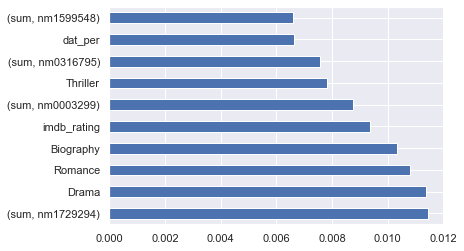

(sum, nm1729294)    0.011464
Drama               0.011380
Romance             0.010806
Biography           0.010322
imdb_rating         0.009378
(sum, nm0003299)    0.008772
Thriller            0.007824
(sum, nm0316795)    0.007567
dat_per             0.006646
(sum, nm1599548)    0.006605
dtype: float64


In [326]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print(feat_importances.nlargest(10))  #print 10 best features

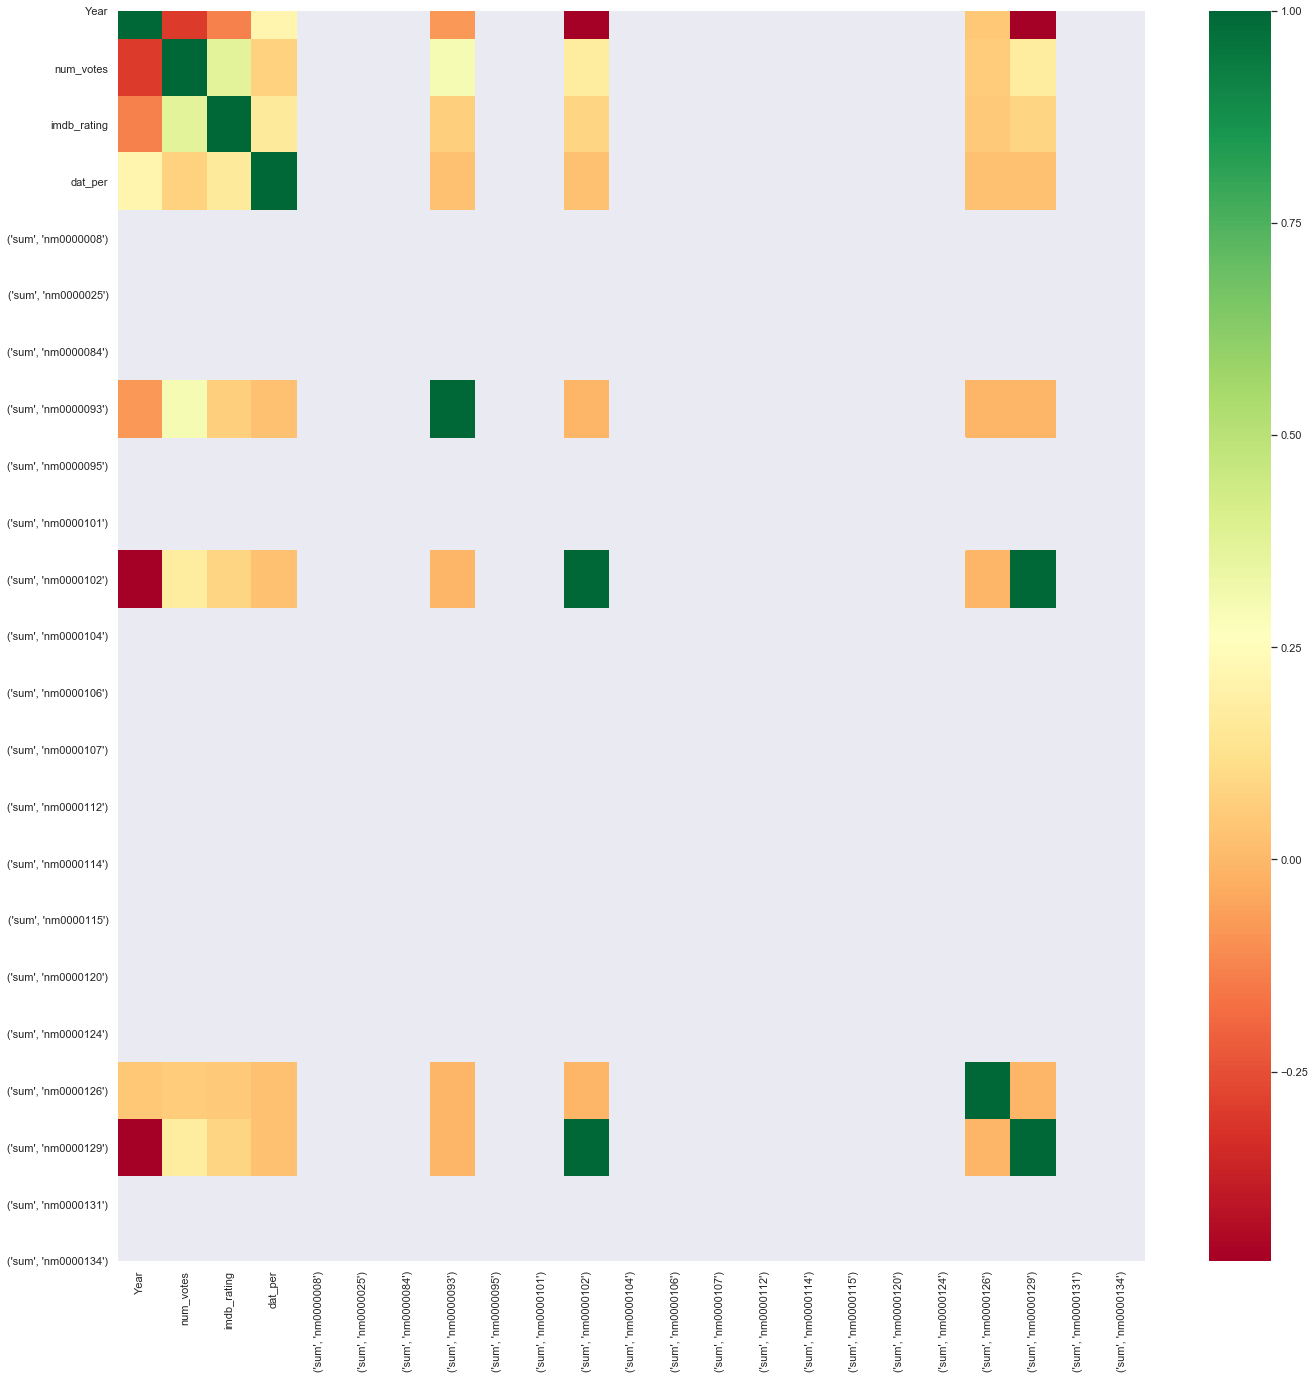

In [365]:
import pandas as pd
import numpy as np
import seaborn as sns


X = X_train.iloc[:,0:23]  #independent columns
y = y_train    #target column i.e price range
#get correlations of each .features in dataset
#corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(23,23))
#plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
sns.heatmap(X[X.corr(method ='pearson').index].corr(),cmap="RdYlGn")

In [394]:
# df[df.columns[1:]].corr()['LoanAmount'][:]

UX = U2[U2.your_rating.notnull()]    #.drop( ['your_rating'], axis=1)
UX[UX.columns[1:]].corr(method ='pearson')['your_rating'][:]                         \
                  .sort_values(kind="quicksort",ascending=False).head(12)

your_rating         1.000000
rate_diff2          0.879561
imdb_rating         0.446310
(sum, nm0799777)    0.221840
(sum, nm5104365)    0.220538
(sum, nm0660245)    0.220538
(sum, nm2817784)    0.220538
(sum, nm2830113)    0.220538
(sum, nm1227525)    0.220538
(sum, nm0160272)    0.220538
(sum, nm0652619)    0.220538
(sum, nm0237040)    0.220538
Name: your_rating, dtype: float64

In [381]:
top_corr_features.to_numpy()
X.corr(method ='pearson').dropna(how='all')
X.corr(method ='pearson').dropna(how='all').index

Index([              'Year',          'num_votes',        'imdb_rating',
                  'dat_per', ('sum', 'nm0000025'), ('sum', 'nm0000093'),
       ('sum', 'nm0000095'), ('sum', 'nm0000102'), ('sum', 'nm0000126'),
       ('sum', 'nm0000129'),
       ...
                   'Family',            'Fantasy',            'History',
                    'Music',            'Musical',            'Mystery',
                  'Romance',              'Sport',           'Thriller',
                      'War'],
      dtype='object', length=1165)

In [380]:
W =X.corr(method ='pearson').dropna(how='all').abs().unstack().sort_values(kind="quicksort",ascending=False)
W.head(22)

War               War                 1.0
(sum, nm2951613)  (sum, nm4966991)    1.0
                  (sum, nm8101778)    1.0
(sum, nm2957696)  (sum, nm0005349)    1.0
                  (sum, nm0791868)    1.0
                  (sum, nm1633021)    1.0
                  (sum, nm1710548)    1.0
                  (sum, nm1964259)    1.0
                  (sum, nm1965525)    1.0
                  (sum, nm2957696)    1.0
                  (sum, nm3517400)    1.0
                  (sum, nm4340024)    1.0
                  (sum, nm4907810)    1.0
(sum, nm2973253)  (sum, nm0151419)    1.0
                  (sum, nm0164809)    1.0
                  (sum, nm0324041)    1.0
                  (sum, nm2125212)    1.0
(sum, nm2951613)  (sum, nm8101777)    1.0
                  (sum, nm4343886)    1.0
(sum, nm2973253)  (sum, nm2973253)    1.0
(sum, nm2951613)  (sum, nm2951613)    1.0
(sum, nm2950293)  (sum, nm0343419)    1.0
dtype: float64

In [310]:
#S.loc[:, ('tconst', 'nconst')].to_numpy()

np.vstack((y_pred, y_test,  X_test.imdb_rating   ) ).reshape( 3 , 52 )

array([[ 7. ,  6. ,  9. ,  8. ,  8. ,  5. ,  8. ,  4. ,  6. ,  8. ,  5. ,
         5. ,  4. ,  6. ,  5. ,  6. ,  7. ,  8. ,  6. ,  6. ,  5. ,  7. ,
         6. ,  5. ,  8. ,  5. ,  6. ,  4. ,  7. ,  6. ,  8. ,  6. ,  7. ,
         5. ,  4. ,  5. ,  5. ,  5. ,  5. ,  7. ,  8. ,  6. ,  6. , 10. ,
         7. ,  7. ,  7. ,  5. ,  6. ,  4. ,  6. ,  8. ],
       [ 6. ,  8. ,  7. ,  7. ,  7. ,  6. ,  8. ,  7. ,  8. ,  7. ,  4. ,
         9. ,  7. ,  7. ,  8. ,  7. ,  5. ,  7. ,  7. ,  7. ,  7. ,  5. ,
         2. ,  8. ,  6. ,  7. ,  5. ,  8. ,  7. ,  8. ,  7. ,  8. ,  5. ,
         5. ,  3. ,  6. ,  7. ,  6. ,  5. ,  5. ,  5. ,  7. ,  5. ,  6. ,
         6. ,  9. ,  5. ,  8. ,  7. ,  7. ,  6. ,  6. ],
       [ 7.7,  7.1,  7.7,  6.7,  8. ,  7. ,  8. ,  7.9,  7.4,  7.7,  6.5,
         8.2,  7.6,  6.7,  7.5,  7.5,  6.7,  7.3,  7.2,  8.2,  7.5,  6.6,
         6.9,  8. ,  6.9,  7.7,  6.4,  7.8,  6.7,  7.7,  7.4,  6.9,  7.2,
         5.9,  4.1,  6.4,  7. ,  6.8,  7.3,  7.4,  5.6,  7.2,  6.1,  7. 

In [223]:
 

#for i, val in enumerate(P.nconst):
#    print(i, val)
    
 
    
X = S.pivot_table(  index   = ( 'tconst')
                  , columns = 'nconst'
              #     , aggfunc = ['count', 'min', 'max', 'mean']
                   , aggfunc = [ 'count'] 
               #    , margins = True
                   , fill_value = 0
                 )   


count                                                    \
              Const                                                     
nconst    nm0000008 nm0000025 nm0000084 nm0000093 nm0000095 nm0000101   
tconst                                                                  
tt0026557         0         0         0         0         0         0   
tt0032801         0         0         0         0         0         0   
tt0037871         0         0         0         0         0         0   
tt0037899         0         0         0         0         0         0   
tt0048502         0         0         0         0         0         0   

                                                   ...                      \
                                                   ...  ordering             
nconst    nm0000102 nm0000104 nm0000106 nm0000107  ... nm9951276 nm9951340   
tconst                                             ...                       
tt0026557         0         0         0         0  ...         0         0   
tt0032801         0         0         0         0  ...         0         0   
tt0037871         0         0         0         0  ...         0         0   
tt0037899         0         0         0         0  ...         0         0   
tt0048502         0         0         0         0  ...         0         0   

                                                                       \
                                                                        
nconst    nm9951354 nm9978507 nm9982187 nm9985209 nm9985619 nm9985727   
tconst                                                                  
tt0026557         0         0         0         0         0         0   
tt0032801         0         0         0         0         0         0   
tt0037871         0         0         0         0         0         0   
tt0037899         0         0         0         0         0         0   
tt0048502         0         0         0         0         0         0   

                               
                               
nconst    nm9985761 nm9993187  
tconst                         
tt0026557         0         0  
tt0032801         0         0  
tt0037871         0         0  
tt0037899         0         0  
tt0048502         0         0  

[5 rows x 29830 columns]

In [227]:
X.reset_index().head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 29831 entries, (tconst, , ) to (count, ordering, nm9993187)
dtypes: int64(29830), object(1)
memory usage: 1.1+ MB


In [ ]:
X =(data.set_index(['const','year'])
        .genres.str.split(',\s*', expand=True)
        .stack()
        .reset_index()
        .pivot_table(index=['const','year'], columns=0, fill_value=0, aggfunc='size')
)
X.head()

genres_total     =  X.sum(axis = 1, skipna = True) 
XX               = pd.concat([X, genres_total,], axis=1)
XX.head(10).unstack()

In [ ]:
#read in traffic data--takes a bit, be patient...
traffic_df = pd.read_csv('../input/dot_traffic_2015.txt.gz', compression='gzip', 
                         header=0, sep=',', quotechar='"')

top250_titles = top250_hist.filter(items = [ 'const'])
top250_titles = top250_titles.drop_duplicates()
 
data = pd.merge(   top250_titles 
                 , title_principals[title_principals.category=='cinematographer']
                 , how='left'
                 , left_on = 'const', right_on = 'tconst')

In [202]:
X = combdf.pivot_table(  values ='rate_diff2'
                  , index   = ( 'Directors', 'Title')
                  , columns = 'dat_per'
              #     , aggfunc = ['count', 'min', 'max', 'mean']
                 , aggfunc = [ 'mean'] 
                  , margins = True
                 )
#X.reset_index(inplace = True) 

X 
#X.query('dat_per == ["All"]' )
 
#combdf.loc[combdf.Directors == 'Alex Winter', :]

mean  \
dat_per                                                             2015   
Directors           Title                                                  
Aaron Sorkin        Molly's Game                                     NaN   
Adam Sobel          The Workers Cup                                  NaN   
Alessandro Aronadio Orecchie                                         NaN   
Alex Gibney         Going Clear: Scientology & the Prison of Belief  0.0   
Alex Winter         Deep Web                                        -1.0   
...                                                                  ...   
William Oldroyd     Lady Macbeth                                     NaN   
Wolfgang Petersen   Air Force One                                    NaN   
Woody Allen         Blue Jasmine                                     NaN   
Zaradasht Ahmed     Nowhere to Hide                                  NaN   
All                                                                 -0.4   

                                                                               \
dat_per                                                                  2016   
Directors           Title                                                       
Aaron Sorkin        Molly's Game                                          NaN   
Adam Sobel          The Workers Cup                                       NaN   
Alessandro Aronadio Orecchie                                              NaN   
Alex Gibney         Going Clear: Scientology & the Prison of Belief       NaN   
Alex Winter         Deep Web                                              NaN   
...                                                                       ...   
William Oldroyd     Lady Macbeth                                    -0.800000   
Wolfgang Petersen   Air Force One                                         NaN   
Woody Allen         Blue Jasmine                                          NaN   
Zaradasht Ahmed     Nowhere to Hide                                       NaN   
All                                                                 -0.627586   

                                                                               \
dat_per                                                                  2017   
Directors           Title                                                       
Aaron Sorkin        Molly's Game                                    -0.500000   
Adam Sobel          The Workers Cup                                 -1.900000   
Alessandro Aronadio Orecchie                                              NaN   
Alex Gibney         Going Clear: Scientology & the Prison of Belief       NaN   
Alex Winter         Deep Web                                              NaN   
...                                                                       ...   
William Oldroyd     Lady Macbeth                                          NaN   
Wolfgang Petersen   Air Force One                                   -1.500000   
Woody Allen         Blue Jasmine                                          NaN   
Zaradasht Ahmed     Nowhere to Hide                                 -1.000000   
All                                                                 -0.719444   

                                                                               \
dat_per                                                                  2018   
Directors           Title                                                       
Aaron Sorkin        Molly's Game                                          NaN   
Adam Sobel          The Workers Cup                                       NaN   
Alessandro Aronadio Orecchie                                         0.800000   
Alex Gibney         Going Clear: Scientology & the Prison of Belief       NaN   
Alex Winter         Deep Web                                              NaN   
...                                                                       ...   
Will

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D606A63EC8>,
      dtype=object)

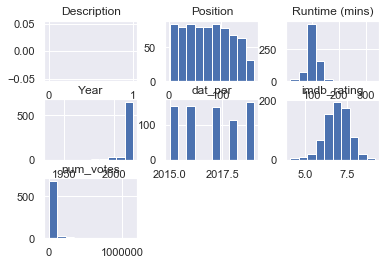

In [57]:
newdf.hist()

C:\Users\cw13\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cw13\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


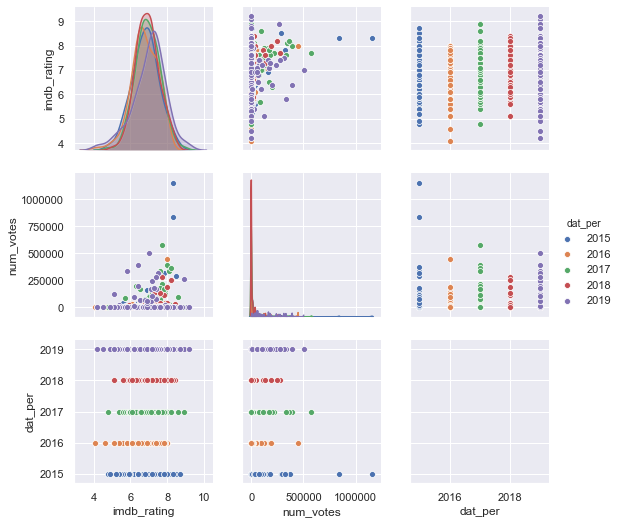

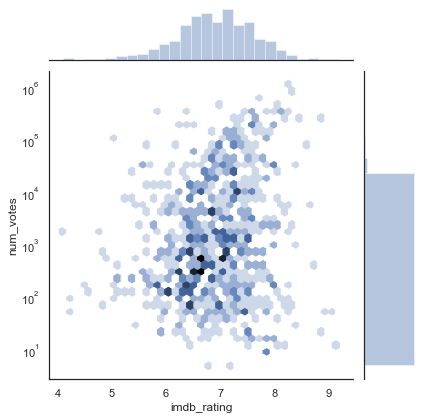

In [60]:
import seaborn as sns
sns.set()
#sns.pairplot(iris, hue='species', size=2.5);
sns.pairplot(newdf.loc[:,('imdb_rating', 'num_votes', 'dat_per')] , hue='dat_per');



with sns.axes_style('white'):
    sns.jointplot("imdb_rating", "num_votes", data=newdf, kind= 'hex', yscale="log")



In [50]:
import numpy as np 
import matplotlib.pyplot as plt
a = np.array([newdf.dat_per,1])
a.shape


(2,)

In [49]:
#newdf.dropna(how='any').shape
newdf.shape

(1174, 16)

In [9]:
newdf.fillna(value='hello').tail(1)   #inplace = True to make it permanent

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,dat_per
164,165,tt2402927,2019-09-18,2019-09-18,hello,Carol,https://www.imdb.com/title/tt2402927/,movie,7.2,118,2015,"Drama, Romance",103411,2015-05-17,Todd Haynes,2019


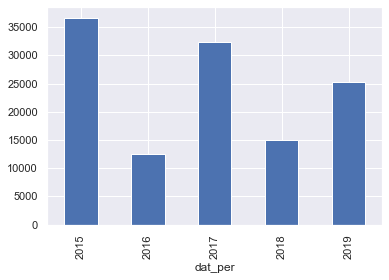

In [66]:
import pandas as pd 
%matplotlib inline

newdf.groupby('dat_per').imdb_rating.agg(['count', 'min', 'max', 'mean'])
newdf.groupby('dat_per').num_votes.mean().plot(kind = 'bar')

In [11]:
from datetime import datetime
import pandas as pd 
# with open('/data/Example2.txt', 'w') as testwritefile:
   # testwritefile.write(str(newdf))
  
newdf.to_csv('out/zff_over_time.csv'
             , sep=';'
             , encoding='utf-8'
             , index=False)

# write output 
newdf.to_csv('out/zff_total_' + datetime.now().strftime('%Y%m%d%H%M%S') + '.csv'
             , sep=';'
             , encoding='utf-8'
             , index=False)    
newdf.shape  

(738, 16)

In [12]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    
    for s in liste: 
        keyword_count[s] = 0
        
    for liste_keywords in df[ref_col].str.split(','):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
            
        for s in liste_keywords: 

             if pd.notnull(s):  keyword_count[s] = keyword_count[s] +1    
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    
    keyword_occurences = []
    
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
        
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

In [13]:
#clean white spaces
newdf['Genres']       = newdf['Genres'].str.replace(" ","")

set_keywords = set()

for liste_keywords in newdf['Genres'].str.split(',').values:    
    if type(liste_keywords) == float: continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

#keyword_occurences, dum = count_word(newdf, 'Genres', set_keywords)
dum = count_word(newdf, 'Genres', set_keywords)
keyword_occurences[:7]    



NameError: name 'keyword_occurences' is not defined

In [14]:

mylist = ['nowplaying', 'PBS', 'PBS', 'nowplaying', 'job', 'debate', 'thenandnow']
myset = set(mylist)
print(myset)


mylist = list(newdf.Directors)
#mylist = list(a.str.split(',').values)
#myset = set(mylist) 
#print(mylist)
#mylist.count(['Drama'])

a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
d = {x:mylist.count(x) for x in mylist}
d

import collections
a = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
print(counter)

counter=collections.Counter(mylist)
print(counter)



newdf['dat_per'].drop_duplicates().values.tolist()
set(newdf['Genres'].drop_duplicates().values.tolist())



{'job', 'thenandnow', 'PBS', 'nowplaying', 'debate'}
Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
Counter({nan: 29, 'Mike Leigh': 13, 'Olivier Assayas': 13, 'Roland Emmerich': 9, 'Rob Reiner': 8, 'Niklaus Hilber': 3, 'Todd Haynes': 3, 'Stephen Frears': 3, 'Jim Jarmusch': 3, 'Federico Veiroj': 3, 'Pablo Larraín': 3, 'Barry Levinson': 3, 'Kurt Früh': 3, 'Christoph Schaub': 3, 'Michael Steiner': 3, 'Hirokazu Koreeda': 3, 'Gabriel Mascaro': 2, 'Jonas Carpignano': 2, 'Alex Winter': 2, 'Marie Kreutzer': 2, 'Andrew Haigh': 2, 'Alex Gibney': 2, 'Frederick Wiseman': 2, 'Léa Pool': 2, 'Noah Baumbach': 2, 'Denis Villeneuve': 2, 'Matthew Heineman': 2, 'Herman Yau': 2, 'Céline Sciamma': 2, 'David Fincher': 2, 'Cihan Inan': 2, 'Daniel Schmid': 2, 'Michel Franco': 2, 'Leopold Lindtberg': 2, 'Rolf Lyssy': 2, 'Damien Chazelle': 2, 'Garth Davis': 2, 'Oliver Stone': 2, 'Olivier Nakache, Éric Toledano': 2, 'László Nemes': 2, 'Yorgos Lanthimos': 2, 'Claire Denis': 2, 'Dieudo Hamadi': 2, 'Laura Mora Ortega': 2, 

{'Action',
 'Action,Adventure,Comedy',
 'Action,Adventure,Drama,Fantasy,History',
 'Action,Adventure,Family,Fantasy,Mystery',
 'Action,Adventure,Fantasy,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi,Thriller',
 'Action,Biography,Drama,Sport',
 'Action,Comedy,Crime',
 'Action,Comedy,Drama',
 'Action,Comedy,Thriller',
 'Action,Crime,Drama,Mystery,Thriller',
 'Action,Crime,Drama,Thriller',
 'Action,Crime,Drama,Thriller,Western',
 'Action,Crime,Thriller',
 'Action,Drama,History,Thriller',
 'Action,Drama,History,War',
 'Action,Drama,Mystery,Sci-Fi,Thriller',
 'Action,Drama,Sci-Fi,Thriller',
 'Action,Drama,Thriller',
 'Action,Drama,Western',
 'Action,Thriller',
 'Adventure,Biography,Comedy,Drama',
 'Adventure,Biography,Drama',
 'Adventure,Biography,Drama,Thriller',
 'Adventure,Comedy,Crime,Family',
 'Adventure,Drama',
 'Adventure,Drama,Family',
 'Adventure,Drama,Mystery',
 'Adventure,Drama,Mystery,Sci-Fi',
 'Adventure,Drama,Romance',
 'Adventure,Drama,Romance,Sport',
 'Adven

In [15]:
import numpy as np 
a= newdf['Genres'].str.replace(" ","")  #remove leading blanks and others

set_keywords = a.str.split(',').values

for i in range(0,3):
#    newdf['Genres'].drop_duplicates().values.tolist()
     a.iloc[[i]]
     i= i+1
        
a.str.split(",").iloc[[2]]

2    [Drama, Thriller]
Name: Genres, dtype: object

In [151]:
a            = newdf['Genres'].str.replace(" ","") 

vertical_stack   = pd.DataFrame()
horizontal_stack = pd.DataFrame()

for i in range (0,6):
      for genre  in a.iloc[[i]].str.split(','):
            
                 lst  = newdf.iloc[[i]]['Title']
                 lst2 = newdf.iloc[[i]]['Genres'].str.replace(" ","")  
                 #lst2 = genre

                 df = pd.DataFrame(
                                    list(zip(lst, lst2))
                                   , columns =['Name', 'value']
                                  ) 

                 # Stack the DataFrames on top of each other
                 vertical_stack = pd.concat([vertical_stack, df], axis=0)

                 # Place the DataFrames side by side
                 horizontal_stack = pd.concat([horizontal_stack, df], axis=1)

                 print(i, genre)  
                 
      i = i+1
vertical_stack
 

0 ['Drama', 'Sci-Fi', 'Thriller']
1 ['Drama', 'Thriller']
2 ['Documentary', 'Biography', 'Drama', 'History', 'Romance']
3 ['Crime', 'Drama']
4 ['Documentary']
5 ['Drama']


,Name,value
0,Take Shelter,"Drama,Sci-Fi,Thriller"
0,Contagion,"Drama,Thriller"
0,Agnus Dei: Cordero de Dios,"Documentary,Biography,Drama,History,Romance"
0,Dead Man Walking,"Crime,Drama"
0,Page One: Inside the New York Times,Documentary
0,Uzak Ihtimal,Drama


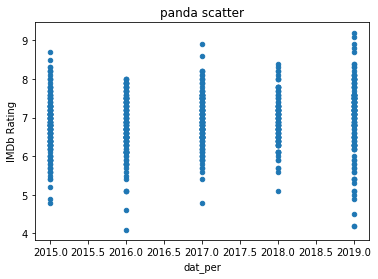

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii



newdf.plot.scatter(x='dat_per', y='IMDb Rating', title='panda scatter')
plt.show()

         Position  Description  IMDb Rating  Runtime (mins)         Year  \
count  738.000000          0.0   727.000000      724.000000   737.000000   
mean    75.333333          NaN     6.902338      101.984807  2013.815468   
std     44.215367          NaN     0.744628       25.636485     9.788310   
min      1.000000          NaN     4.100000       18.000000  1935.000000   
25%     37.250000          NaN     6.500000       90.000000  2015.000000   
50%     74.000000          NaN     6.900000       99.000000  2016.000000   
75%    111.000000          NaN     7.400000      113.000000  2018.000000   
max    165.000000          NaN     9.200000      334.000000  2019.000000   

          Num Votes      dat_per  
count  7.270000e+02   738.000000  
mean   2.485323e+04  2016.975610  
std    8.304376e+04     1.447199  
min    5.000000e+00  2015.000000  
25%    1.690000e+02  2016.000000  
50%    8.670000e+02  2017.000000  
75%    8.712000e+03  2018.000000  
max    1.154366e+06  2019.000000  


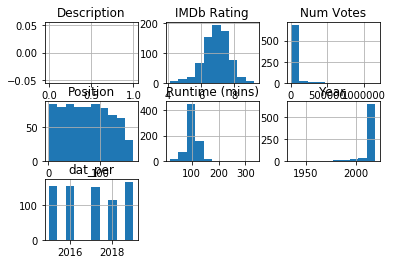

,Position,Description,IMDb Rating,Runtime (mins),Year,Num Votes
dat_per,,,,,,
2015,77.5,NaN,6.824342,100.581699,2012.097403,36701.250000
2016,77.5,NaN,6.783007,99.686275,2011.305195,12484.261438
2017,76.0,NaN,6.945033,101.073826,2013.158940,32435.052980
2018,57.5,NaN,6.926549,103.711712,2017.070175,14951.725664
2019,83.0,NaN,7.034810,105.215190,2016.128049,25268.221519


In [19]:
print(newdf.describe())

newdf.hist()
plt.show()

newdf.groupby('dat_per').mean()

# from pandas.plotting import scatter_matrix
# scatter_matrix(newdf, alpha=0.2, figsize=(6, 6))

In [20]:
newdf.filter(['dat_per','Title', 'Const', 'Directors', 'Release Date', 'Genres', 'Runtme (mins)', 'IMDb Rating', ])

,dat_per,Title,Const,Directors,Release Date,Genres,IMDb Rating
0,2015,Bob and the Trees,tt3473410,Diego Ongaro,2015-01-26,Drama,6.5
1,2015,Boi Neon,tt4899406,Gabriel Mascaro,2015-09-04,Drama,6.8
2,2015,Couple in a Hole,tt2818252,Tom Geens,2015-09-15,"Drama,Thriller",5.5
3,2015,Eva Nová,tt3777384,Marko Skop,2015-09-11,Drama,7.1
4,2015,Hrútar,tt3296658,Grímur Hákonarson,2015-05-28,Drama,7.3
...,...,...,...,...,...,...,...
160,2019,Notes on a Scandal,tt0465551,Richard Eyre,2006-12-25,"Crime,Drama,Romance,Thriller",7.4
161,2019,Elizabeth: The Golden Age,tt0414055,Shekhar Kapur,2007-09-09,"Biography,Drama,History,War",6.8
162,2019,I'm Not There,tt0368794,Todd Haynes,2007-09-03,"Biography,Drama,Music,Western",6.9
163,2019,Blue Jasmine,tt2334873,Woody Allen,2013-07-22,Drama,7.3
